In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sys
# add the path of the virtual environmentsite-packages to colab system path
#sys.path.append("/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages")
sys.path.append("/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages")

In [ ]:
from adjustText import adjust_text
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sys
from glob import iglob
from scipy import sparse
from scipy.sparse import coo_matrix

In [ ]:
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


In [ ]:
# the directory with the `.h5` file
# use gene symbols for the variable names (variables-axis index)
input_dir="/content/drive/MyDrive/LeoDai/Private_Data/Preprocessing/rat"
output_fig_dir="/content/drive/MyDrive/LeoDai/Private_Data/DE_genes/rat"
output_dir="/content/drive/MyDrive/LeoDai/Private_Data/DE_genes/rat"
cluster_dir="/content/drive/MyDrive/LeoDai/Private_Data/Clustering/Rat"
sc.settings.figdir = output_dir

In [ ]:
adata = sc.read_h5ad(os.path.join(input_dir,"rat_all_raw_filt.h5ad"))

pd.DataFrame(adata.var_names).to_csv(os.path.join(output_dir,"rat_genes.txt"),sep="\t",index=False)
adata_glut=sc.read_h5ad(os.path.join(cluster_dir,"Rat_exc_level2_level3_cluster_v2.h5ad"))
adata_exc = adata[adata.obs_names.isin(adata_glut.obs_names),:]
adata_exc.obs["subclass"]=adata_glut.obs["subclass"]
adata_exc.obs['cluster_label']=adata_glut.obs['cluster_label']
adata_exc.write_h5ad(os.path.join(output_dir,"rat_exc_cell_types_raw_filt_norm_subclass.h5ad"),compression='gzip')
#subclass
cellinfo_exc=pd.DataFrame({"cell_id":adata_exc.obs_names,"subclass":adata_exc.obs['subclass'],"batch":adata_exc.obs["sample"]})
#cellinfo
cellinfo_exc.to_csv(os.path.join(output_dir,"rat_cellinfo_exc.txt"),sep="\t", index=False)
#pd.DataFrame(adata.X).to_csv(os.path.join(output_dir,"chimp_raw_counts.txt"),sep="\t")
#M=adata.X.power(-1)
#M.A
sparse.save_npz(
     os.path.join(output_dir, "rat_exc_raw_counts.npz"),
     sparse.csr_matrix(adata_exc.X)
     )

In [ ]:
#celltype

for i in adata_exc.obs['subclass'].unique():

  adata_exc_subclass = adata_exc[adata_exc.obs.subclass == i,:]
  adata_exc_subclass.write_h5ad(os.path.join(output_dir,"rat_exc_" + i + "_raw_filt_norm_subclass.h5ad"),compression='gzip')
  cellinfo_exc_subclass=pd.DataFrame({"cell_id":adata_exc_subclass.obs_names,"cell_type":adata_exc_subclass.obs['cluster_label'],"batch":adata_exc_subclass.obs["sample"]})
  cellinfo_exc_subclass.to_csv(os.path.join(output_dir,"rat_cellinfo_exc_" + i + ".txt"),sep="\t", index=False)
  sparse.save_npz(
     os.path.join(output_dir, "rat_exc_" + i + "_raw_counts.npz"),
     sparse.csr_matrix(adata_exc_subclass.X)
     )

In [ ]:
adata_exc=sc.read_h5ad(os.path.join(output_dir,"rat_exc_cell_types_raw_filt_norm_subclass.h5ad"))
sc.pp.normalize_total(adata_exc, target_sum=1e4)
sc.pp.log1p(adata_exc)

computing PCA
    with n_comps=50
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 30


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
computing PCA
    with n_comps=50


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished (0:00:11)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:21)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


computing PCA
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 30


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
computing PCA
    with n_comps=50


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 30


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
computing PCA
    with n_comps=50


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 30


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
computing PCA
    with n_comps=50


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
computing PCA
    with n_comps=50


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 30


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)
computing PCA
    with n_comps=50


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 30


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
computing PCA
    with n_comps=50


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
computing PCA
    with n_comps=50


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 30


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


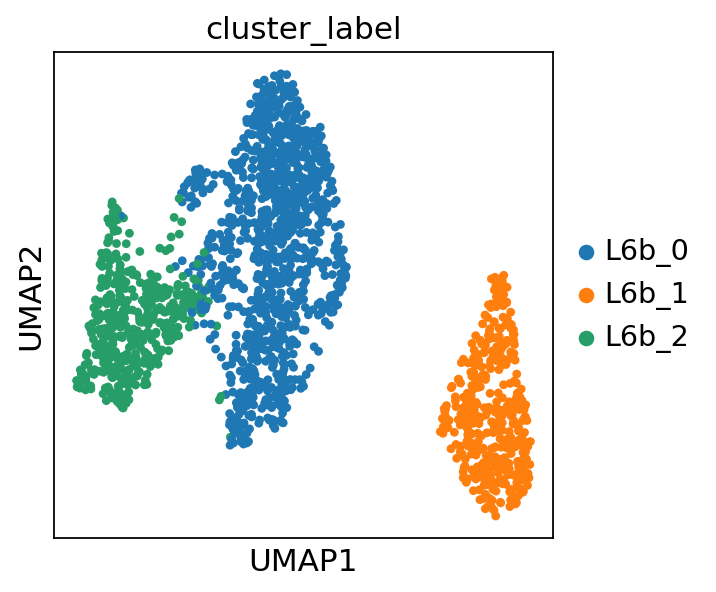

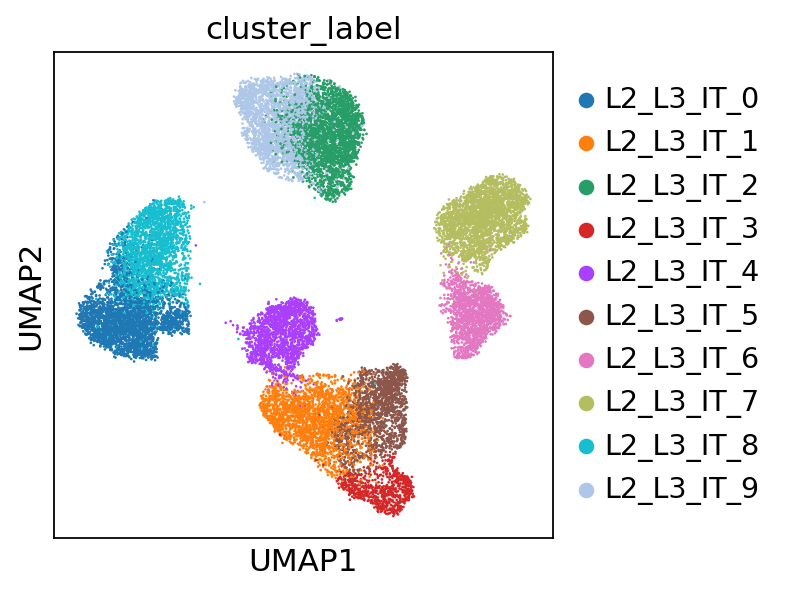

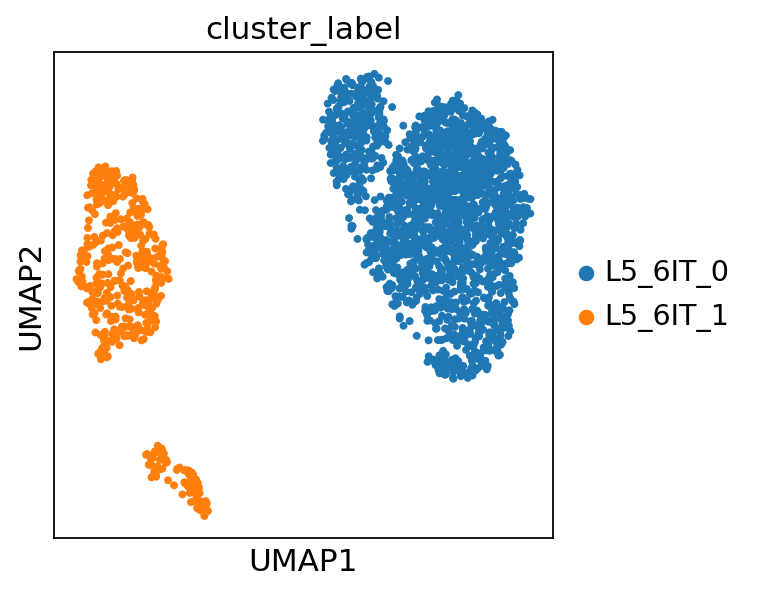

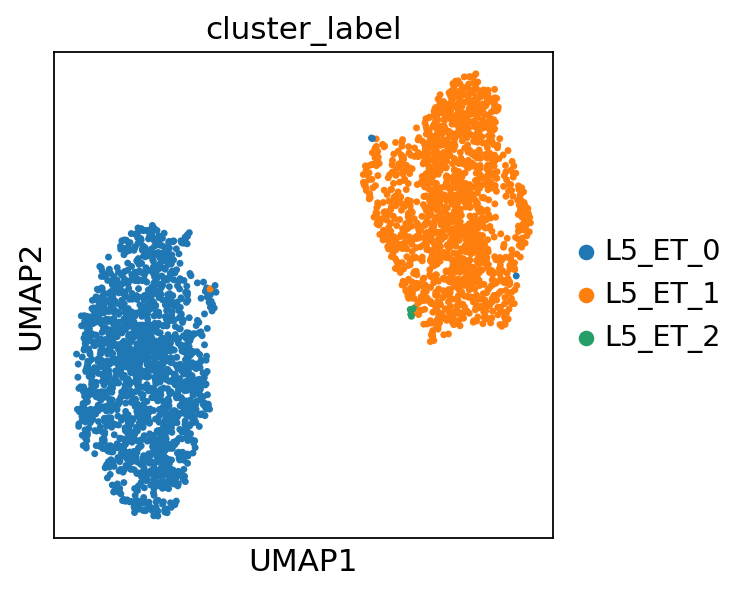

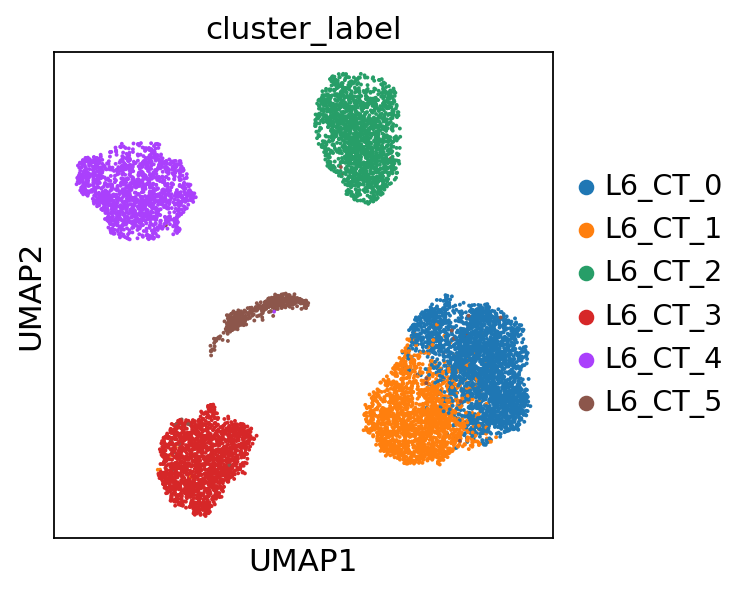

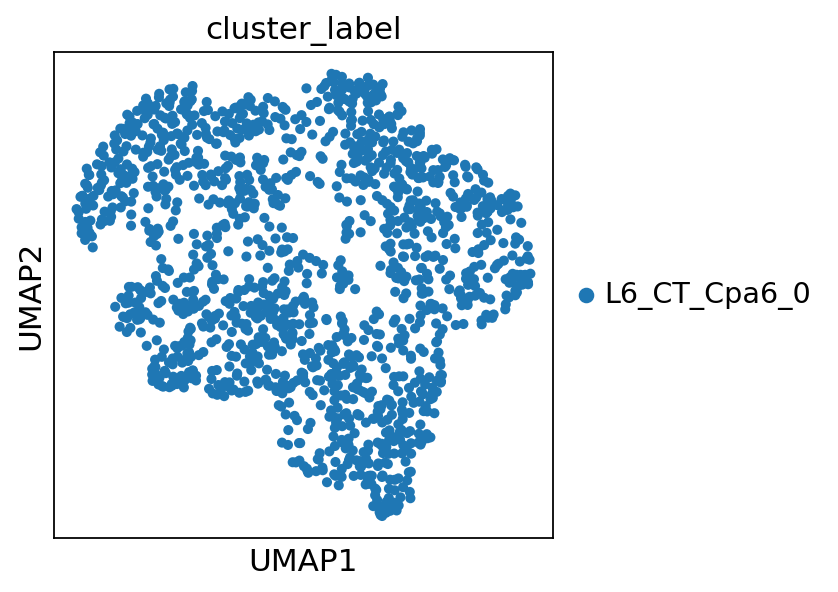

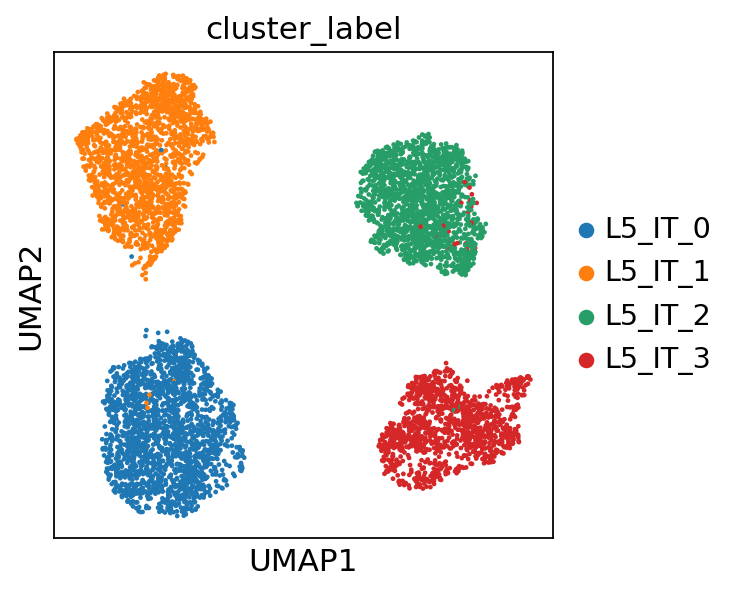

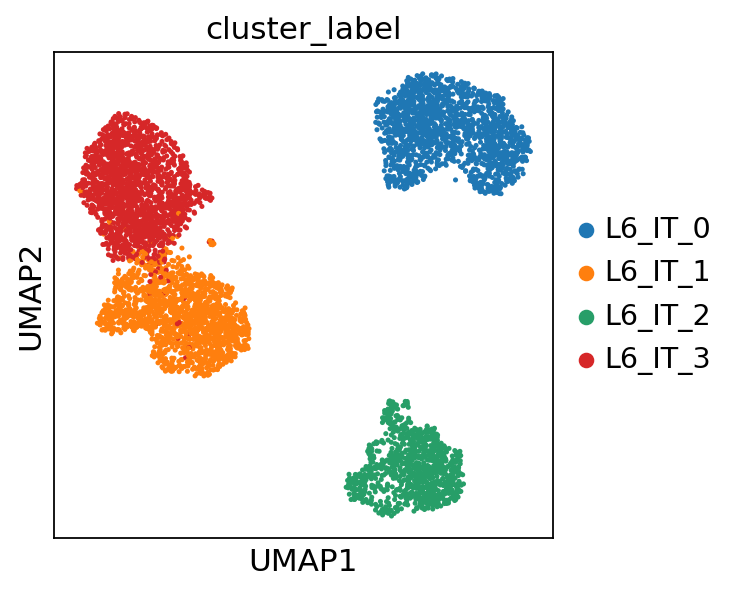

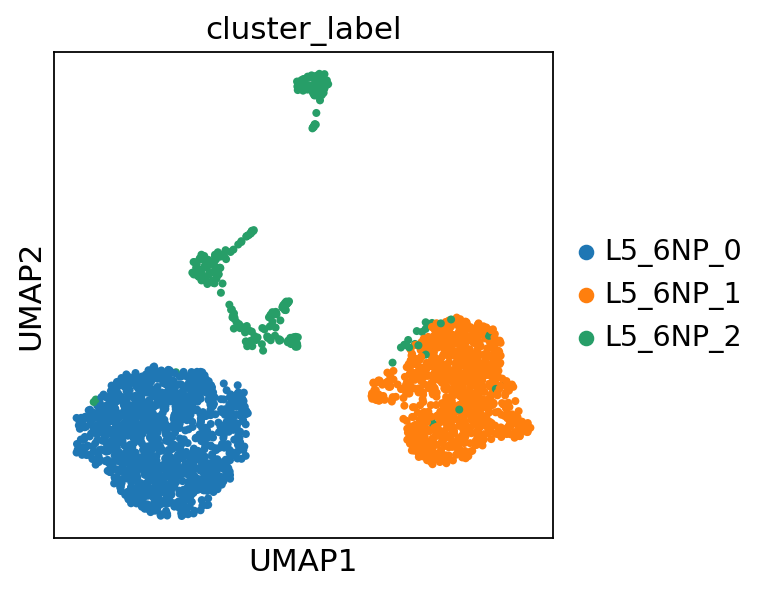

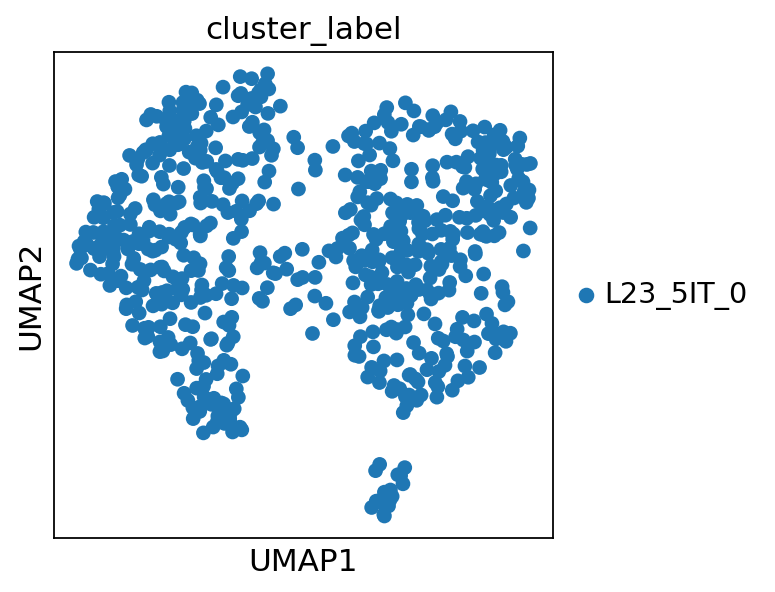

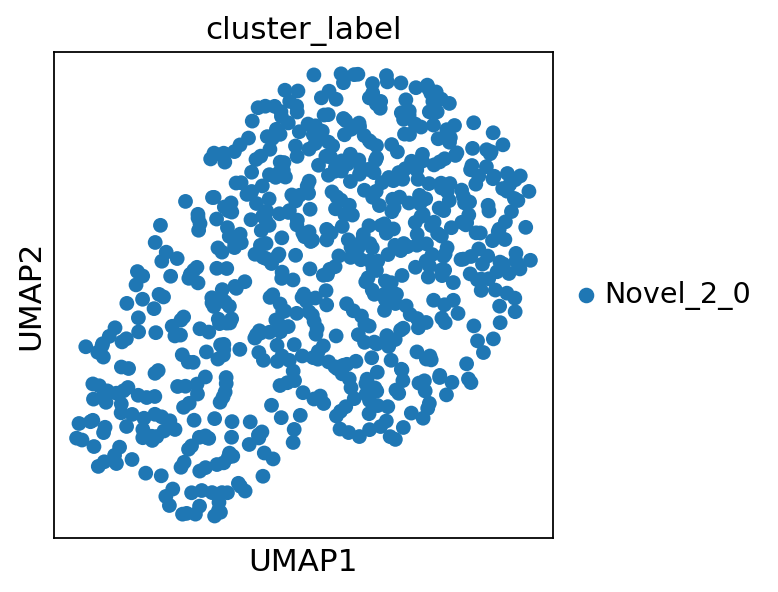

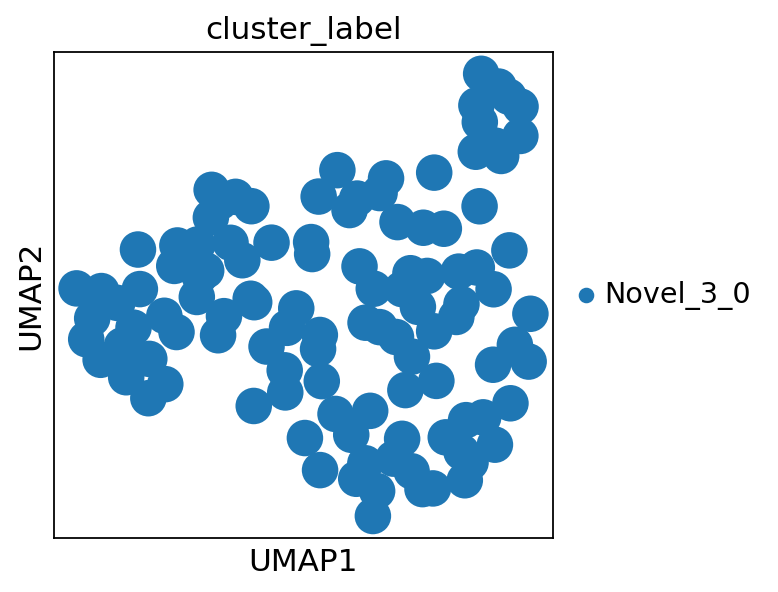

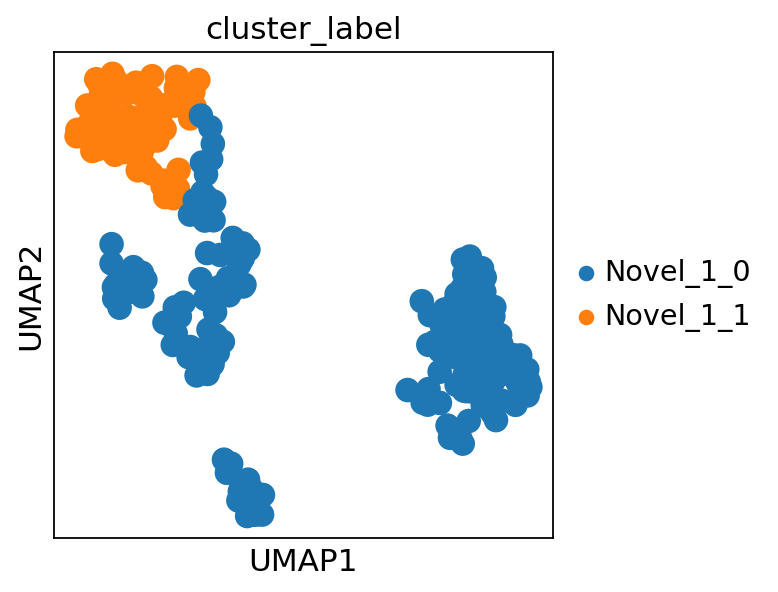

In [ ]:
#exc celltype umaps
gene_mask_exc = []
for i in adata_exc.obs['subclass'].unique():
  gene_mask_exc.extend(pd.read_csv(os.path.join(output_dir, "exc_subclass/run2", i + "_limmatrend_Cov_top_gene_adjPval05_FC1.4.tsv"),sep="\t")["gene"].unique())
adata_exc = adata_exc[:, adata_exc.var_names.isin(gene_mask_exc)]
for i in adata_exc.obs['subclass'].unique():
  adata_subclass = adata_exc[adata_exc.obs.subclass == i,:]
  sc.tl.pca(adata_subclass, svd_solver='arpack')
  sc.pp.neighbors(adata_subclass, n_neighbors=10, n_pcs=30)
  sc.tl.umap(adata_subclass)
  sc.pl.umap(adata_subclass, color=['cluster_label'], cmap="tab20",show=False)
  plt.savefig(os.path.join(output_fig_dir + "/exc_celltype","umap_exc_subtype" + i + ".png"))

In [ ]:
depth_per_gene = adata.obs.total_counts / adata.obs.n_genes_by_counts
print(depth_per_gene[:5])
avg_depth=np.mean(depth_per_gene)
print(avg_depth)
zero_rate = (adata.n_vars - adata.obs.n_genes_by_counts) / adata.n_vars
print(zero_rate)
avg_zero_rate = np.mean(zero_rate)
print(avg_zero_rate)
print(min(zero_rate))
print(max(zero_rate))